In [18]:
# import import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.tree import plot_tree

In [19]:
# load iris data

from sklearn.datasets import load_iris
data = load_iris()

In [20]:
# create dataframe

df = pd.DataFrame(data.data,columns=data.feature_names)

In [21]:
# create target variable

df['target'] = data.target

In [22]:
# final dataframe

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [23]:
# checking the columns

df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target'],
      dtype='object')

In [24]:
# create x and y

x = df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)','petal width (cm)']]
y = df['target']

In [25]:
# train test split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [26]:
# performing transformation

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [27]:
x_train

array([[-0.78680464,  2.52351122, -1.29516608, -1.45491938],
       [ 1.29771674,  0.13721219,  0.74016221,  1.39659299],
       [ 0.3167655 , -0.57867751,  0.11825634,  0.100451  ],
       [-0.54156683,  0.8531019 , -1.18209229, -1.32530518],
       [-1.27728026, -0.10141771, -1.35170298, -1.45491938],
       [ 0.3167655 , -0.34004761,  0.51401462,  0.2300652 ],
       [-0.29632902, -0.10141771,  0.40094083,  0.3596794 ],
       [ 0.68462222,  0.3758421 ,  0.853236  ,  1.39659299],
       [-0.41894792, -1.53319712, -0.05135435, -0.28839159],
       [ 0.3167655 , -1.05593732,  1.02284669,  0.2300652 ],
       [-0.78680464,  0.8531019 , -1.35170298, -1.32530518],
       [ 0.68462222, -0.34004761,  0.28786703,  0.100451  ],
       [ 0.80724112, -0.57867751,  0.45747772,  0.3596794 ],
       [ 0.1941466 , -0.81730742,  0.74016221,  0.4892936 ],
       [-1.15466135,  0.13721219, -1.29516608, -1.32530518],
       [ 0.1941466 ,  0.8531019 ,  0.40094083,  0.4892936 ],
       [-1.03204245,  1.

In [28]:
# decision tree model

decision_model = DecisionTreeClassifier(criterion='gini',max_depth=3)
decision_model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [29]:
# prediction from tree

decision_model.predict(x_test)

array([0, 1, 1, 0, 1, 1, 1, 2, 0, 0, 0, 1, 1, 2, 0, 2, 2, 1, 1, 1, 2, 2,
       1, 0, 2, 1, 0, 0, 2, 0])

In [30]:
# confusion matrix

confusion_matrix(y_test,decision_model.predict(x_test))

array([[10,  0,  0],
       [ 0, 11,  1],
       [ 0,  1,  7]])

[Text(0.375, 0.875, 'petal length (cm) <= -0.758\ngini = 0.666\nsamples = 120\nvalue = [40, 38, 42]\nclass = virginica'),
 Text(0.25, 0.625, 'gini = 0.0\nsamples = 40\nvalue = [40, 0, 0]\nclass = setosa'),
 Text(0.3125, 0.75, 'True  '),
 Text(0.5, 0.625, 'petal width (cm) <= 0.684\ngini = 0.499\nsamples = 80\nvalue = [0, 38, 42]\nclass = virginica'),
 Text(0.4375, 0.75, '  False'),
 Text(0.25, 0.375, 'petal length (cm) <= 0.882\ngini = 0.176\nsamples = 41\nvalue = [0, 37, 4]\nclass = versicolor'),
 Text(0.125, 0.125, 'gini = 0.097\nsamples = 39\nvalue = [0, 37, 2]\nclass = versicolor'),
 Text(0.375, 0.125, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2]\nclass = virginica'),
 Text(0.75, 0.375, 'petal length (cm) <= 0.599\ngini = 0.05\nsamples = 39\nvalue = [0, 1, 38]\nclass = virginica'),
 Text(0.625, 0.125, 'gini = 0.5\nsamples = 2\nvalue = [0, 1, 1]\nclass = versicolor'),
 Text(0.875, 0.125, 'gini = 0.0\nsamples = 37\nvalue = [0, 0, 37]\nclass = virginica')]

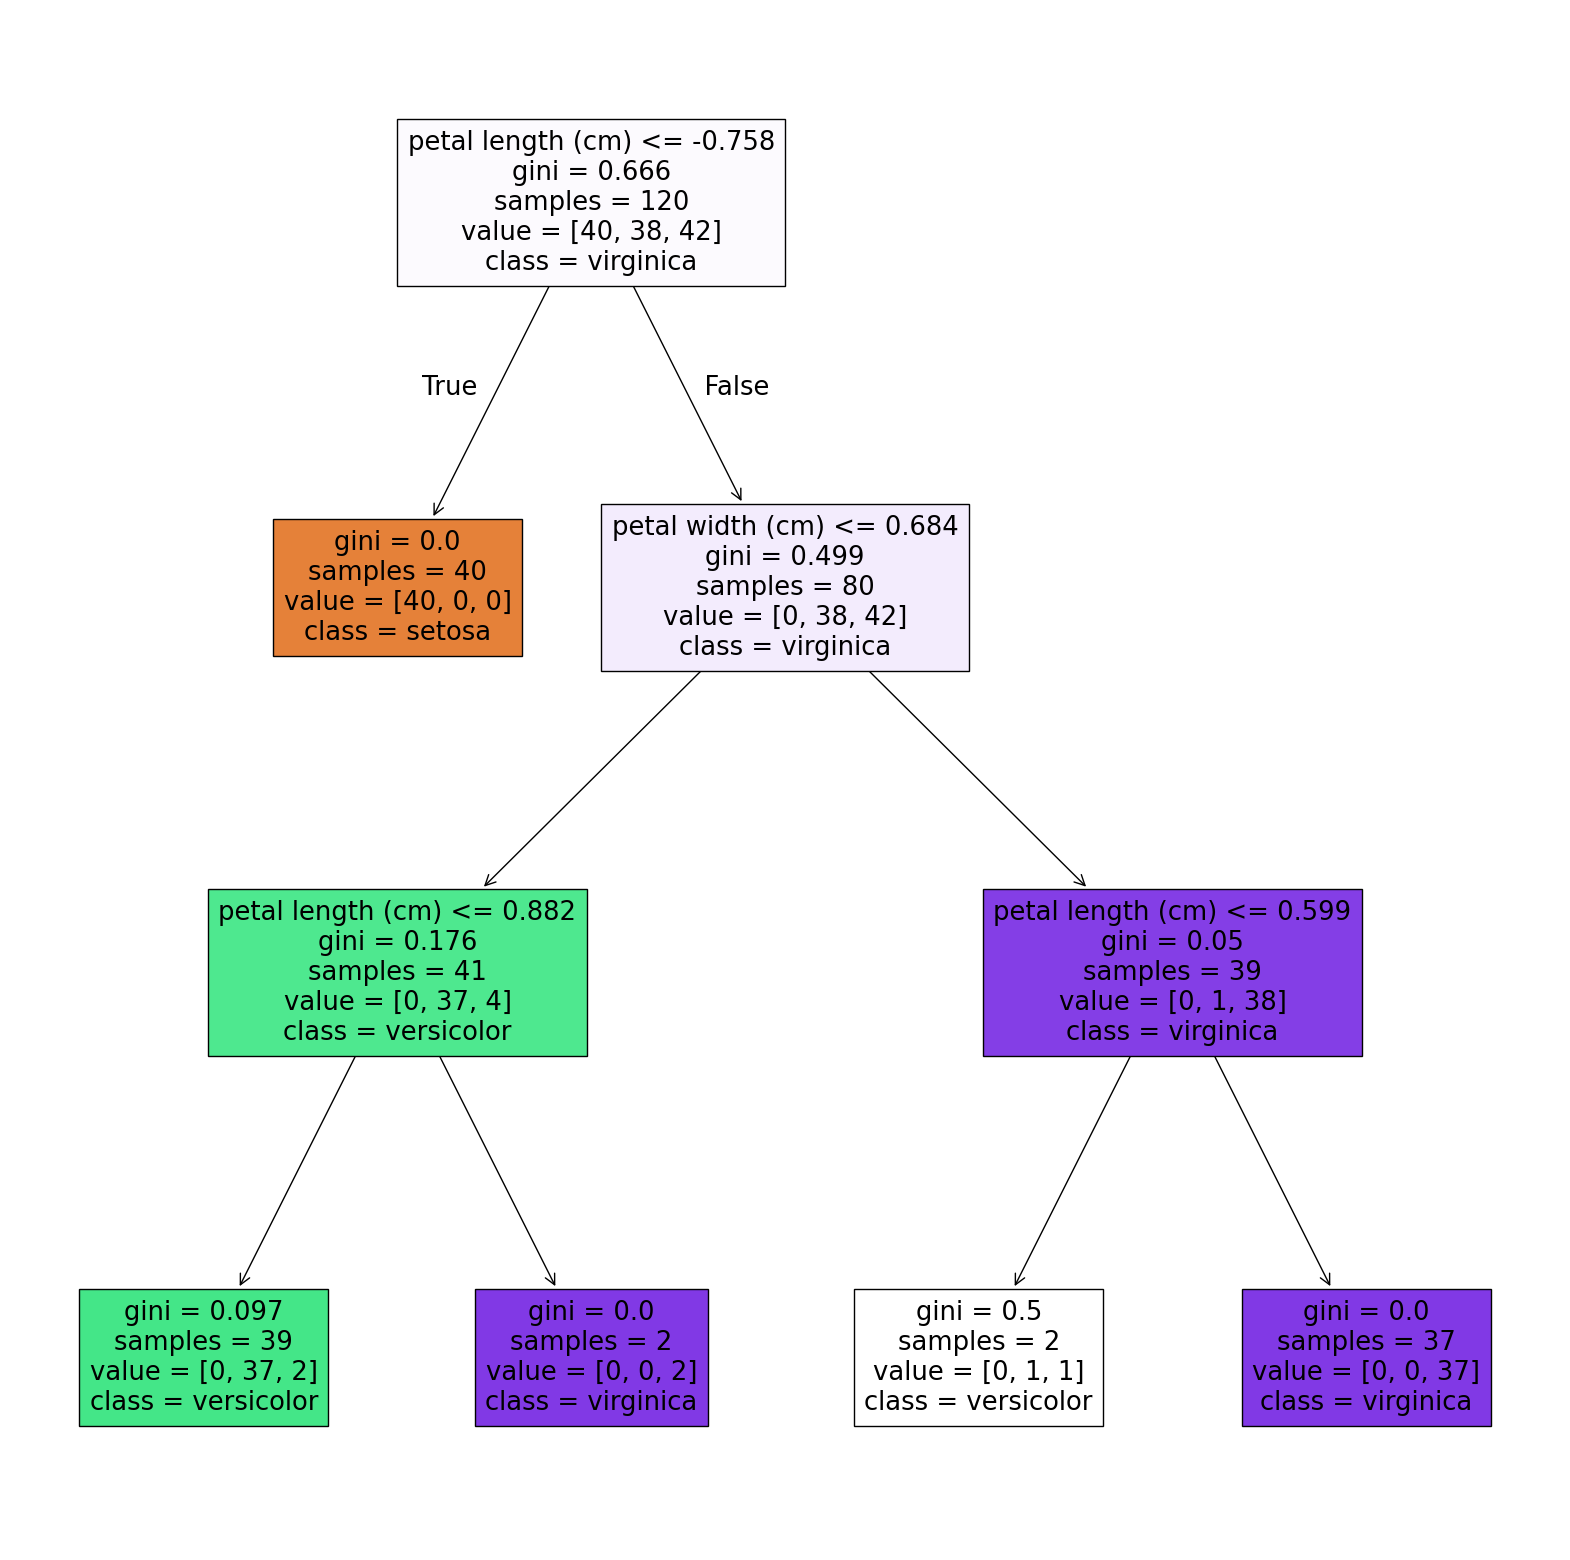

In [31]:
# plot decision tree

plt.figure(figsize=(20,20))
plot_tree(decision_model,feature_names=data.feature_names,class_names=data.target_names,filled=True)

In [55]:
# decision tree model with different depth

decision_model = DecisionTreeClassifier(criterion='gini',max_depth=7)
decision_model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=7)

[Text(0.4444444444444444, 0.9285714285714286, 'petal length (cm) <= -0.758\ngini = 0.666\nsamples = 120\nvalue = [40, 38, 42]\nclass = virginica'),
 Text(0.3333333333333333, 0.7857142857142857, 'gini = 0.0\nsamples = 40\nvalue = [40, 0, 0]\nclass = setosa'),
 Text(0.38888888888888884, 0.8571428571428572, 'True  '),
 Text(0.5555555555555556, 0.7857142857142857, 'petal width (cm) <= 0.684\ngini = 0.499\nsamples = 80\nvalue = [0, 38, 42]\nclass = virginica'),
 Text(0.5, 0.8571428571428572, '  False'),
 Text(0.3333333333333333, 0.6428571428571429, 'petal length (cm) <= 0.882\ngini = 0.176\nsamples = 41\nvalue = [0, 37, 4]\nclass = versicolor'),
 Text(0.2222222222222222, 0.5, 'sepal length (cm) <= -1.093\ngini = 0.097\nsamples = 39\nvalue = [0, 37, 2]\nclass = versicolor'),
 Text(0.1111111111111111, 0.35714285714285715, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]\nclass = virginica'),
 Text(0.3333333333333333, 0.35714285714285715, 'sepal width (cm) <= -1.891\ngini = 0.051\nsamples = 38\nval

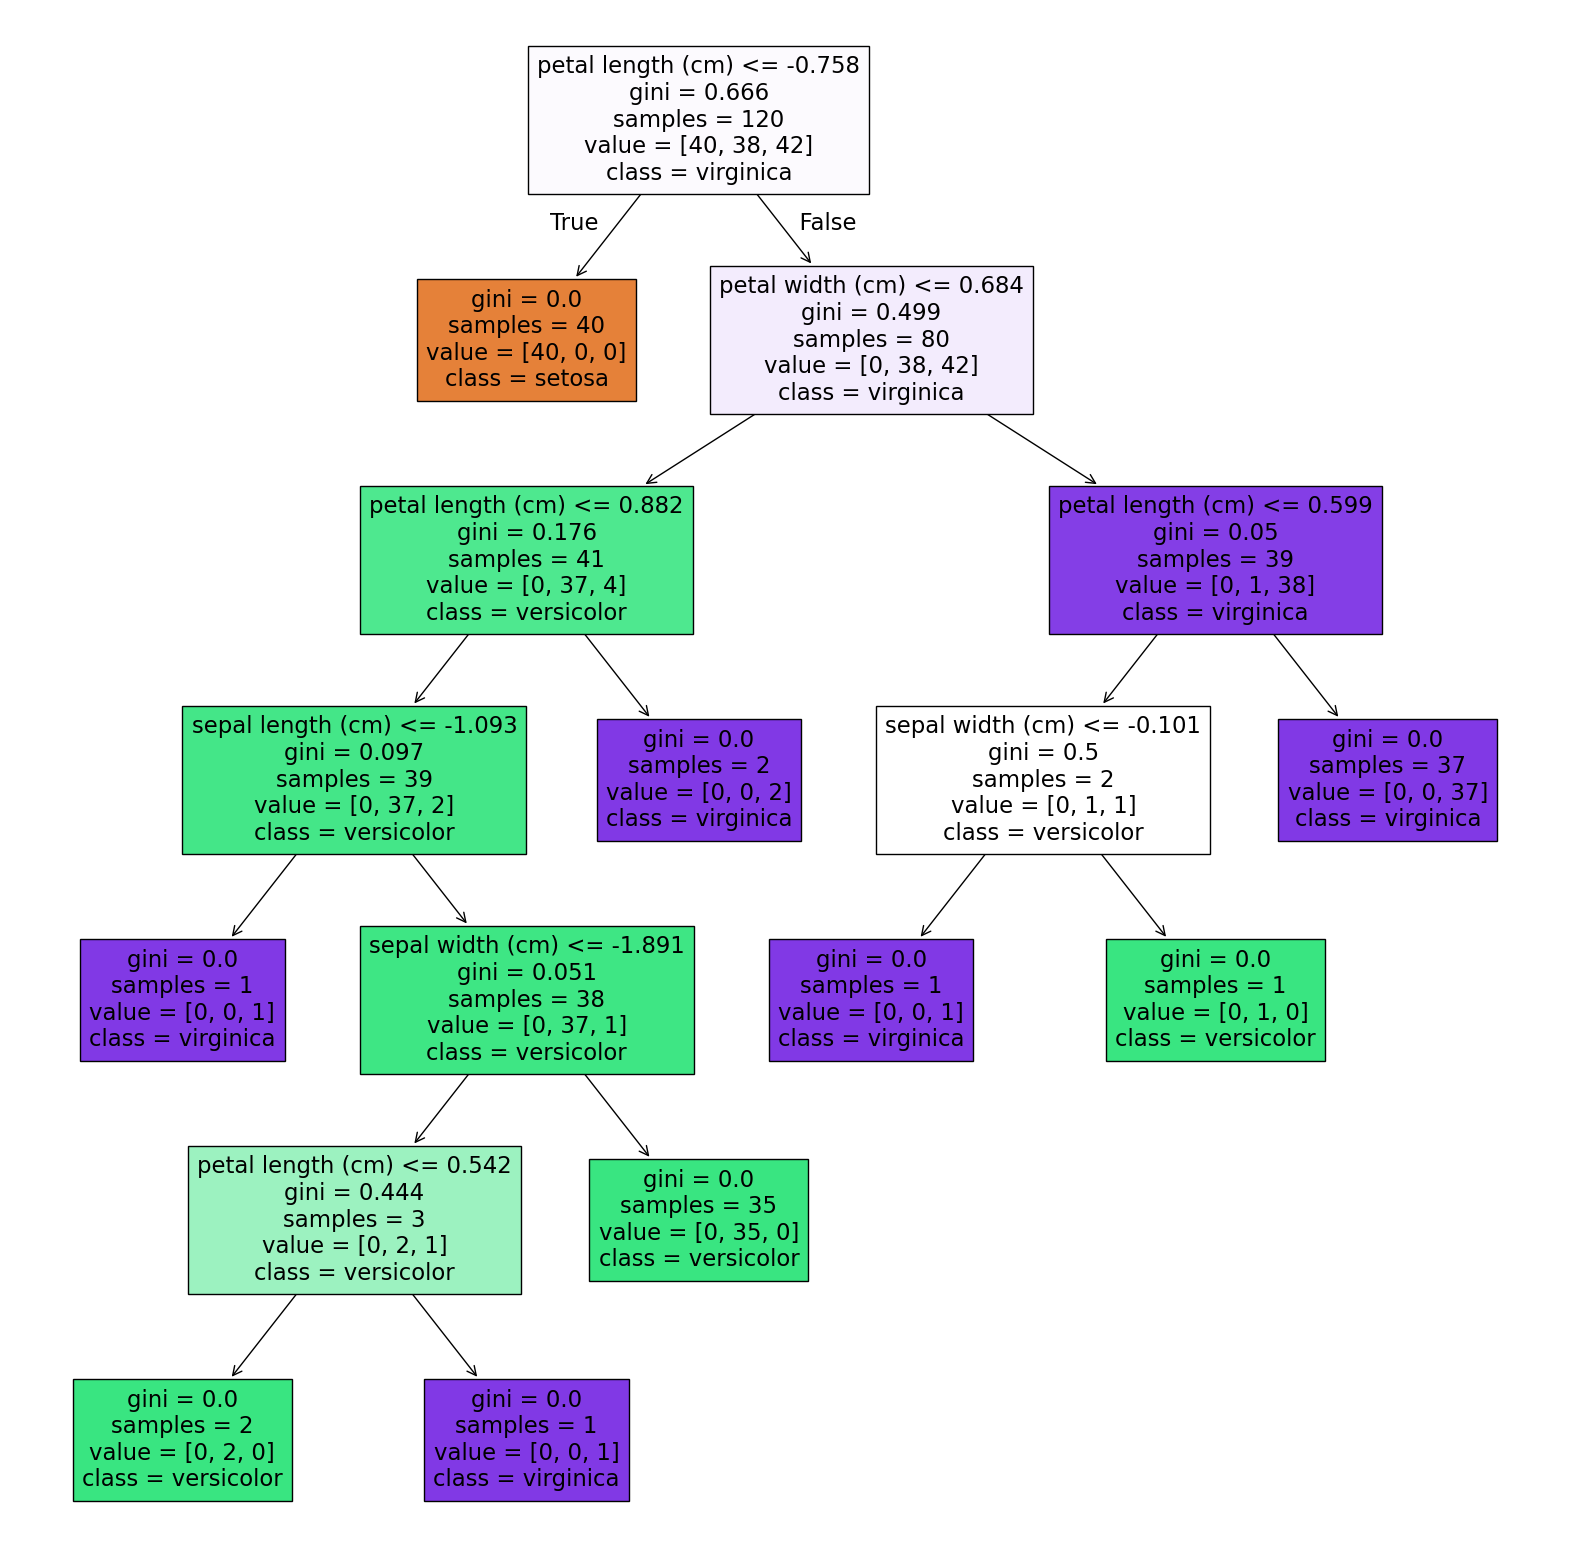

In [56]:
# plot decision tree

plt.figure(figsize=(20,20))
plot_tree(decision_model,feature_names=data.feature_names,class_names=data.target_names,filled=True)

In [34]:
print(f"classification report : {classification_report(y_test,decision_model.predict(x_test))}")

classification report :               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.91      0.83      0.87        12
           2       0.78      0.88      0.82         8

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30



In [60]:
from sklearn.ensemble import RandomForestClassifier

In [61]:
random_model = RandomForestClassifier(n_estimators=100,criterion='gini')

In [62]:
random_model.fit(x_train,y_train)

RandomForestClassifier()

In [63]:
print(f"classification report : {classification_report(y_test,random_model.predict(x_test))}")

classification report :               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.92      0.96        12
           2       0.89      1.00      0.94         8

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



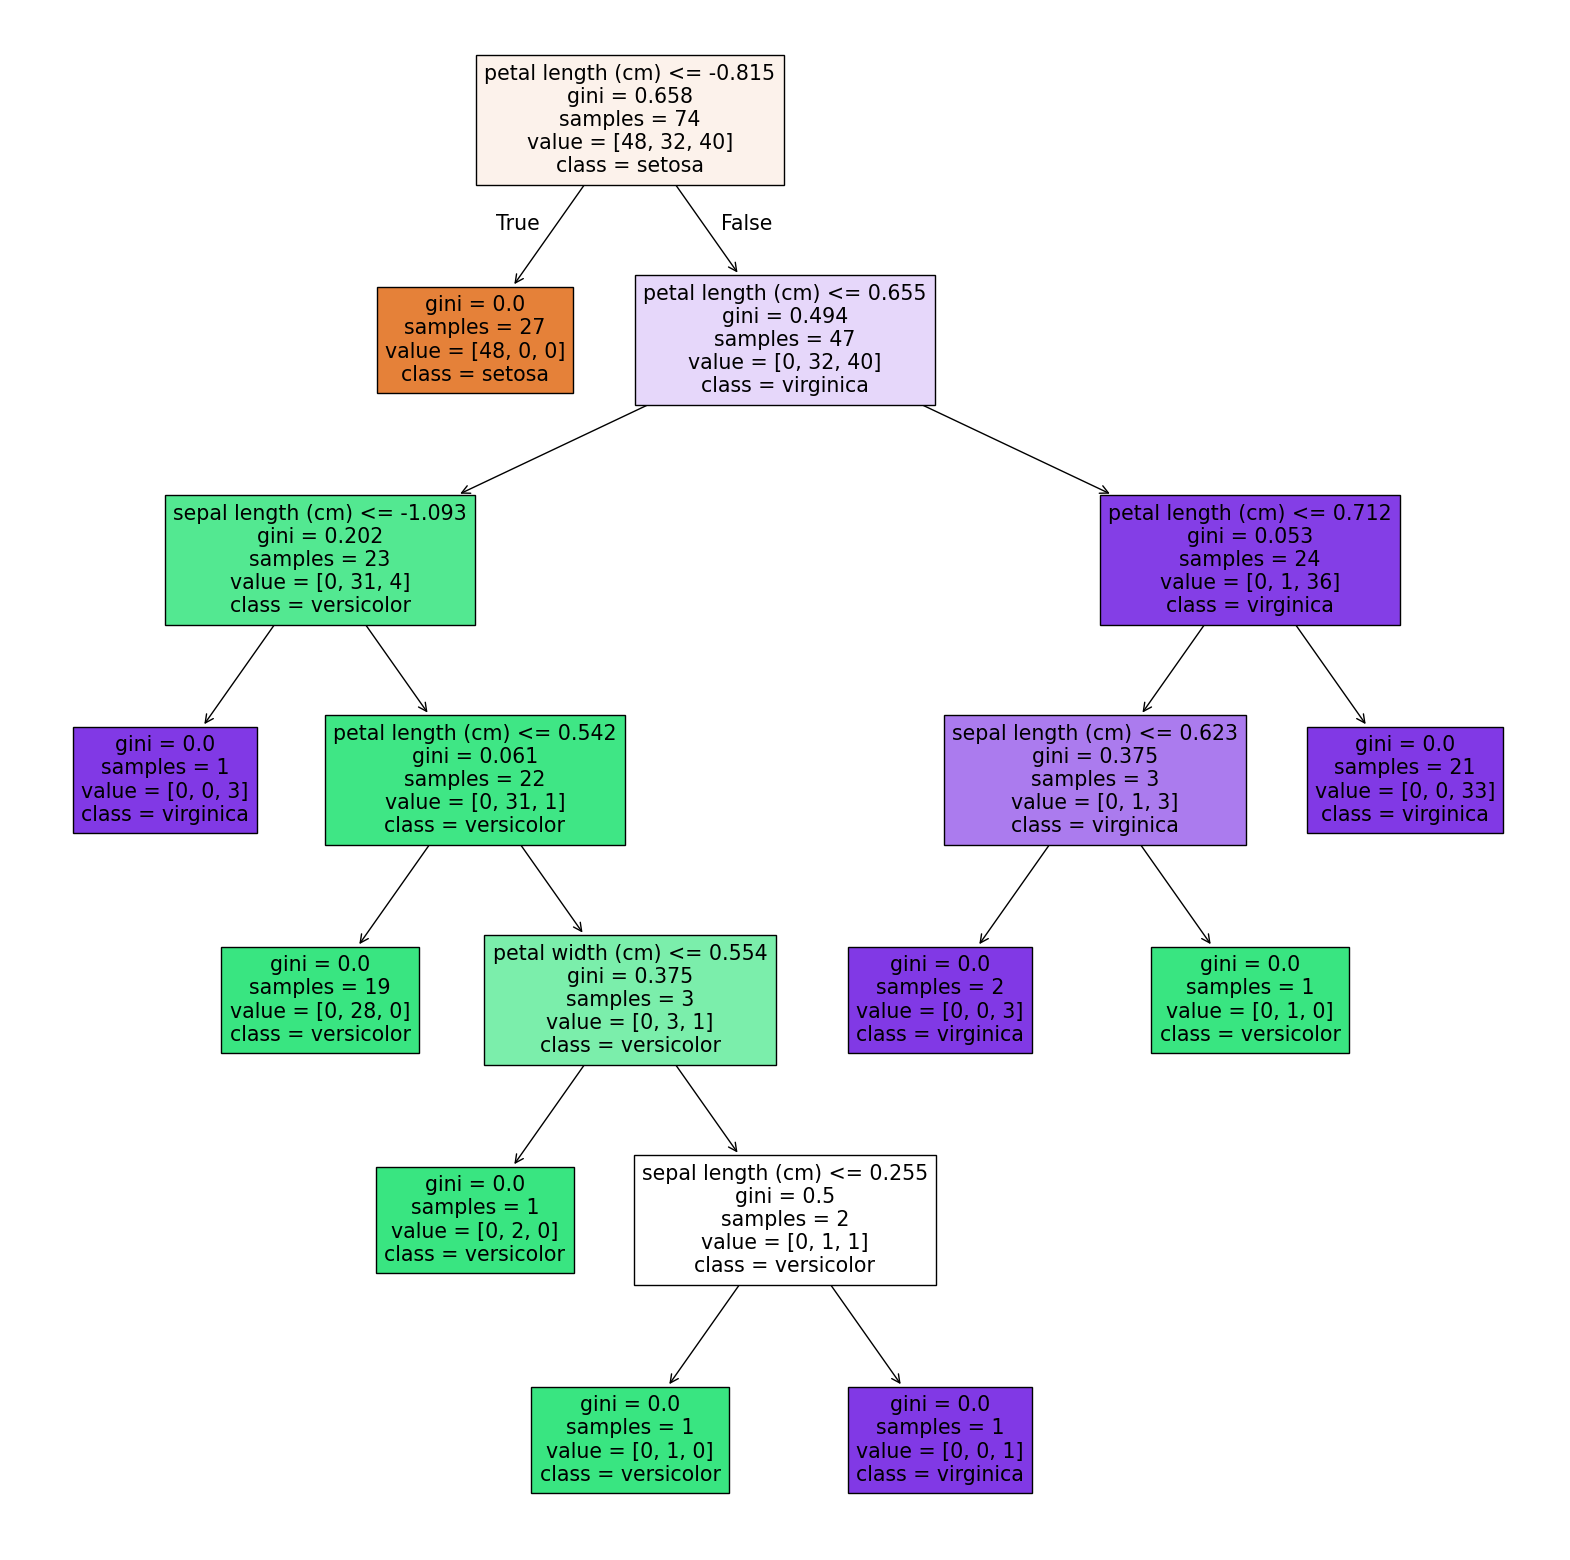

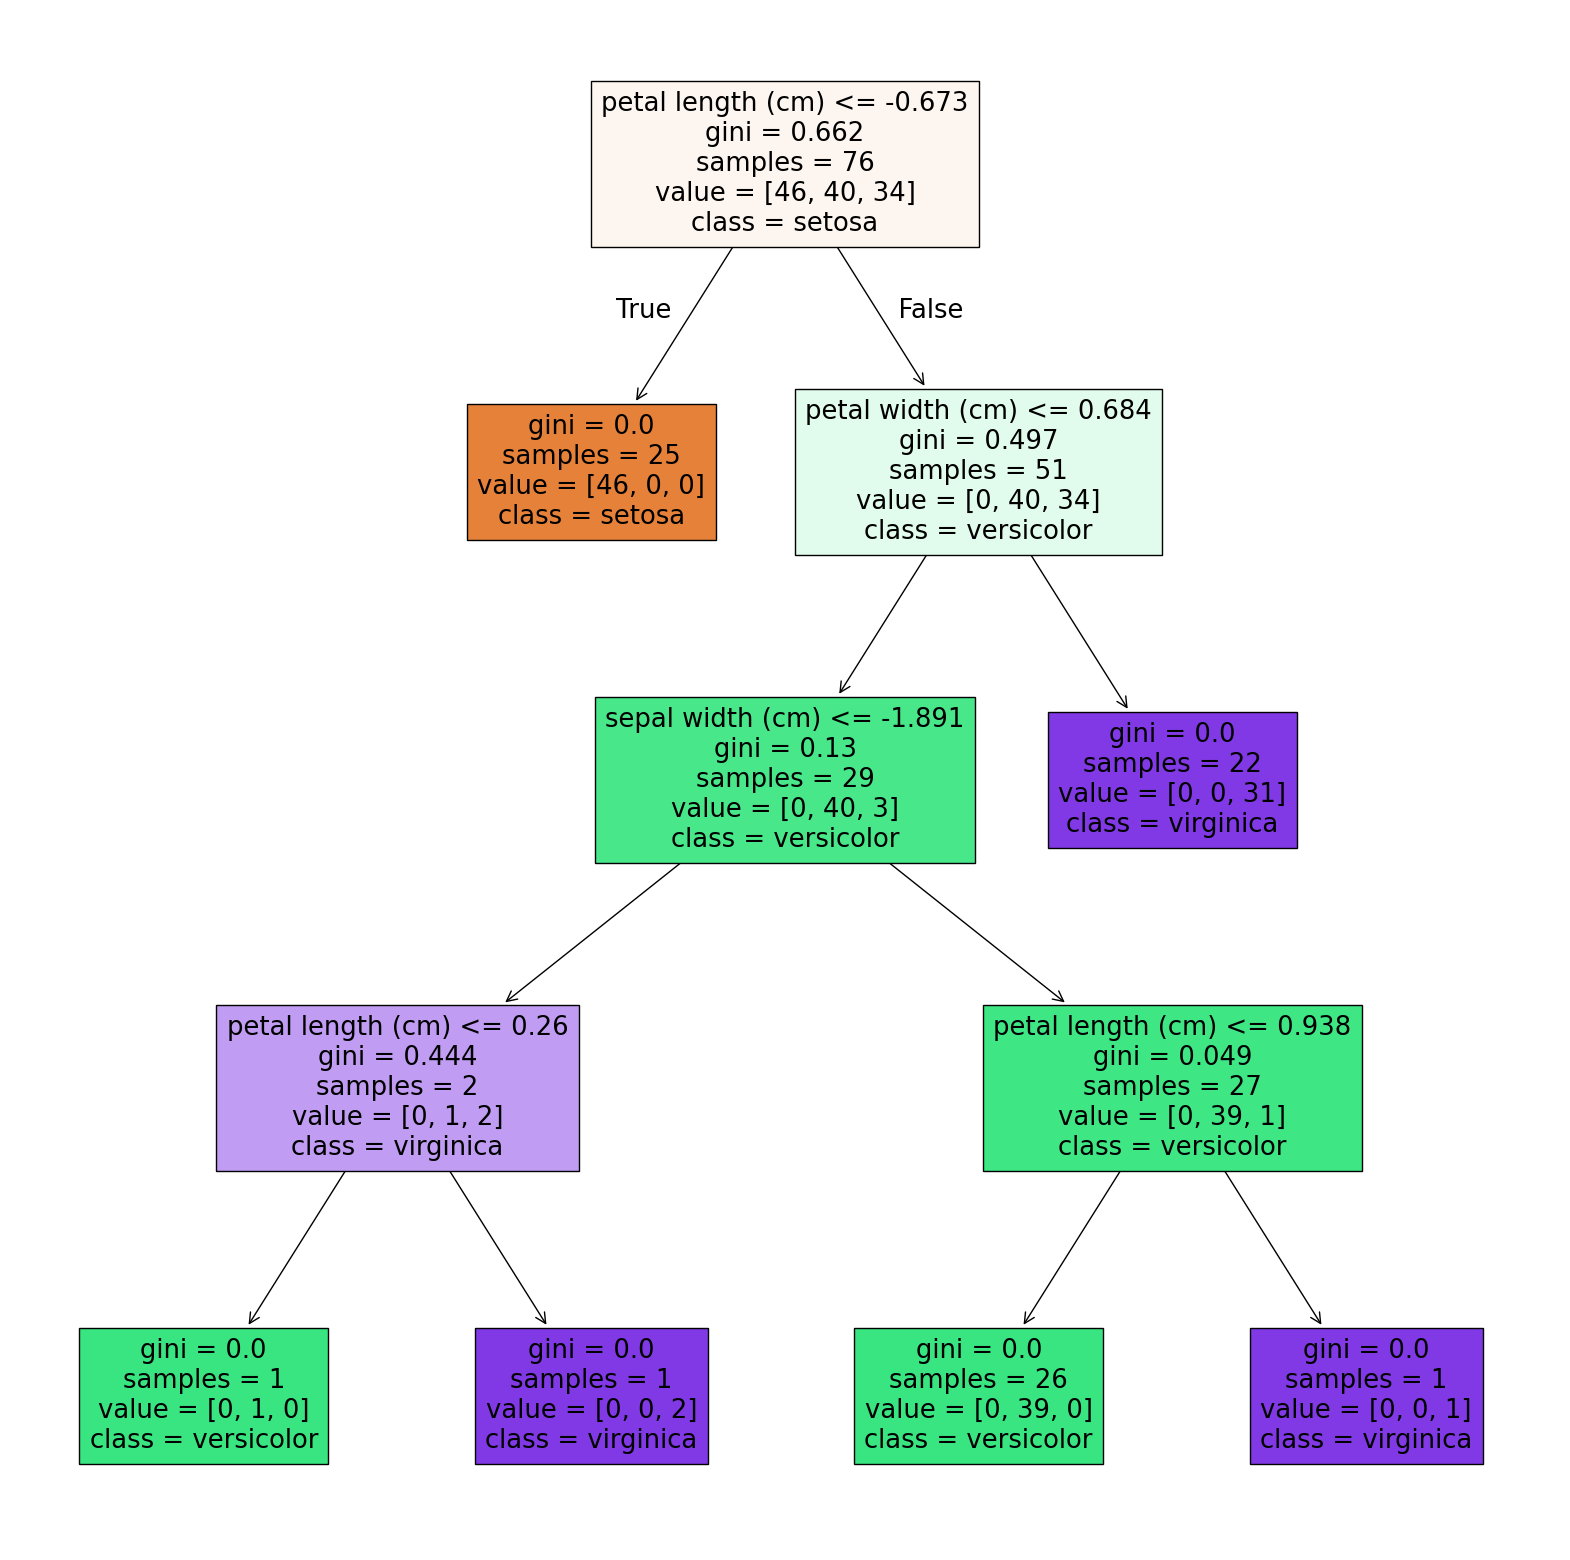

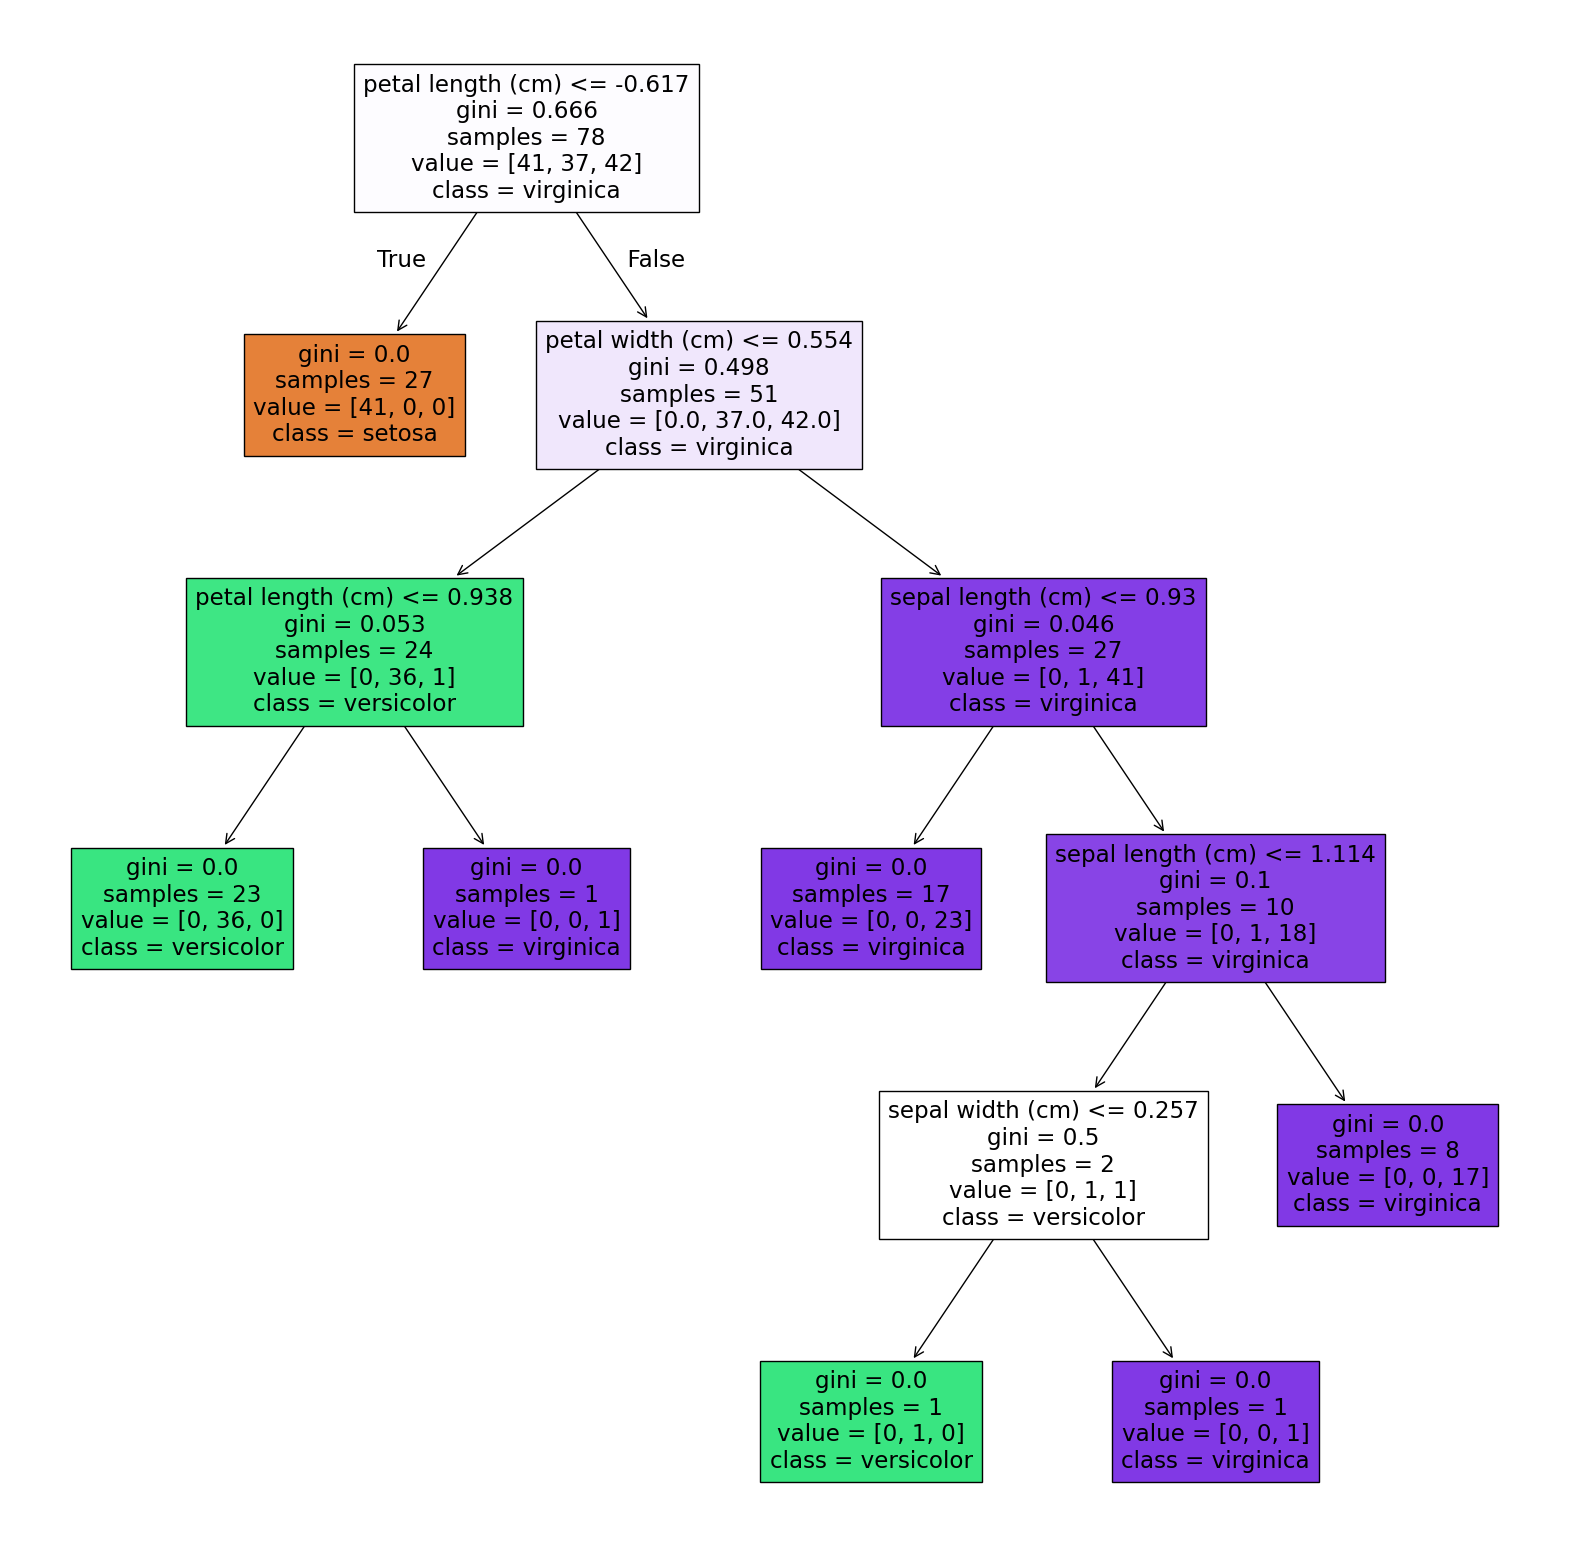

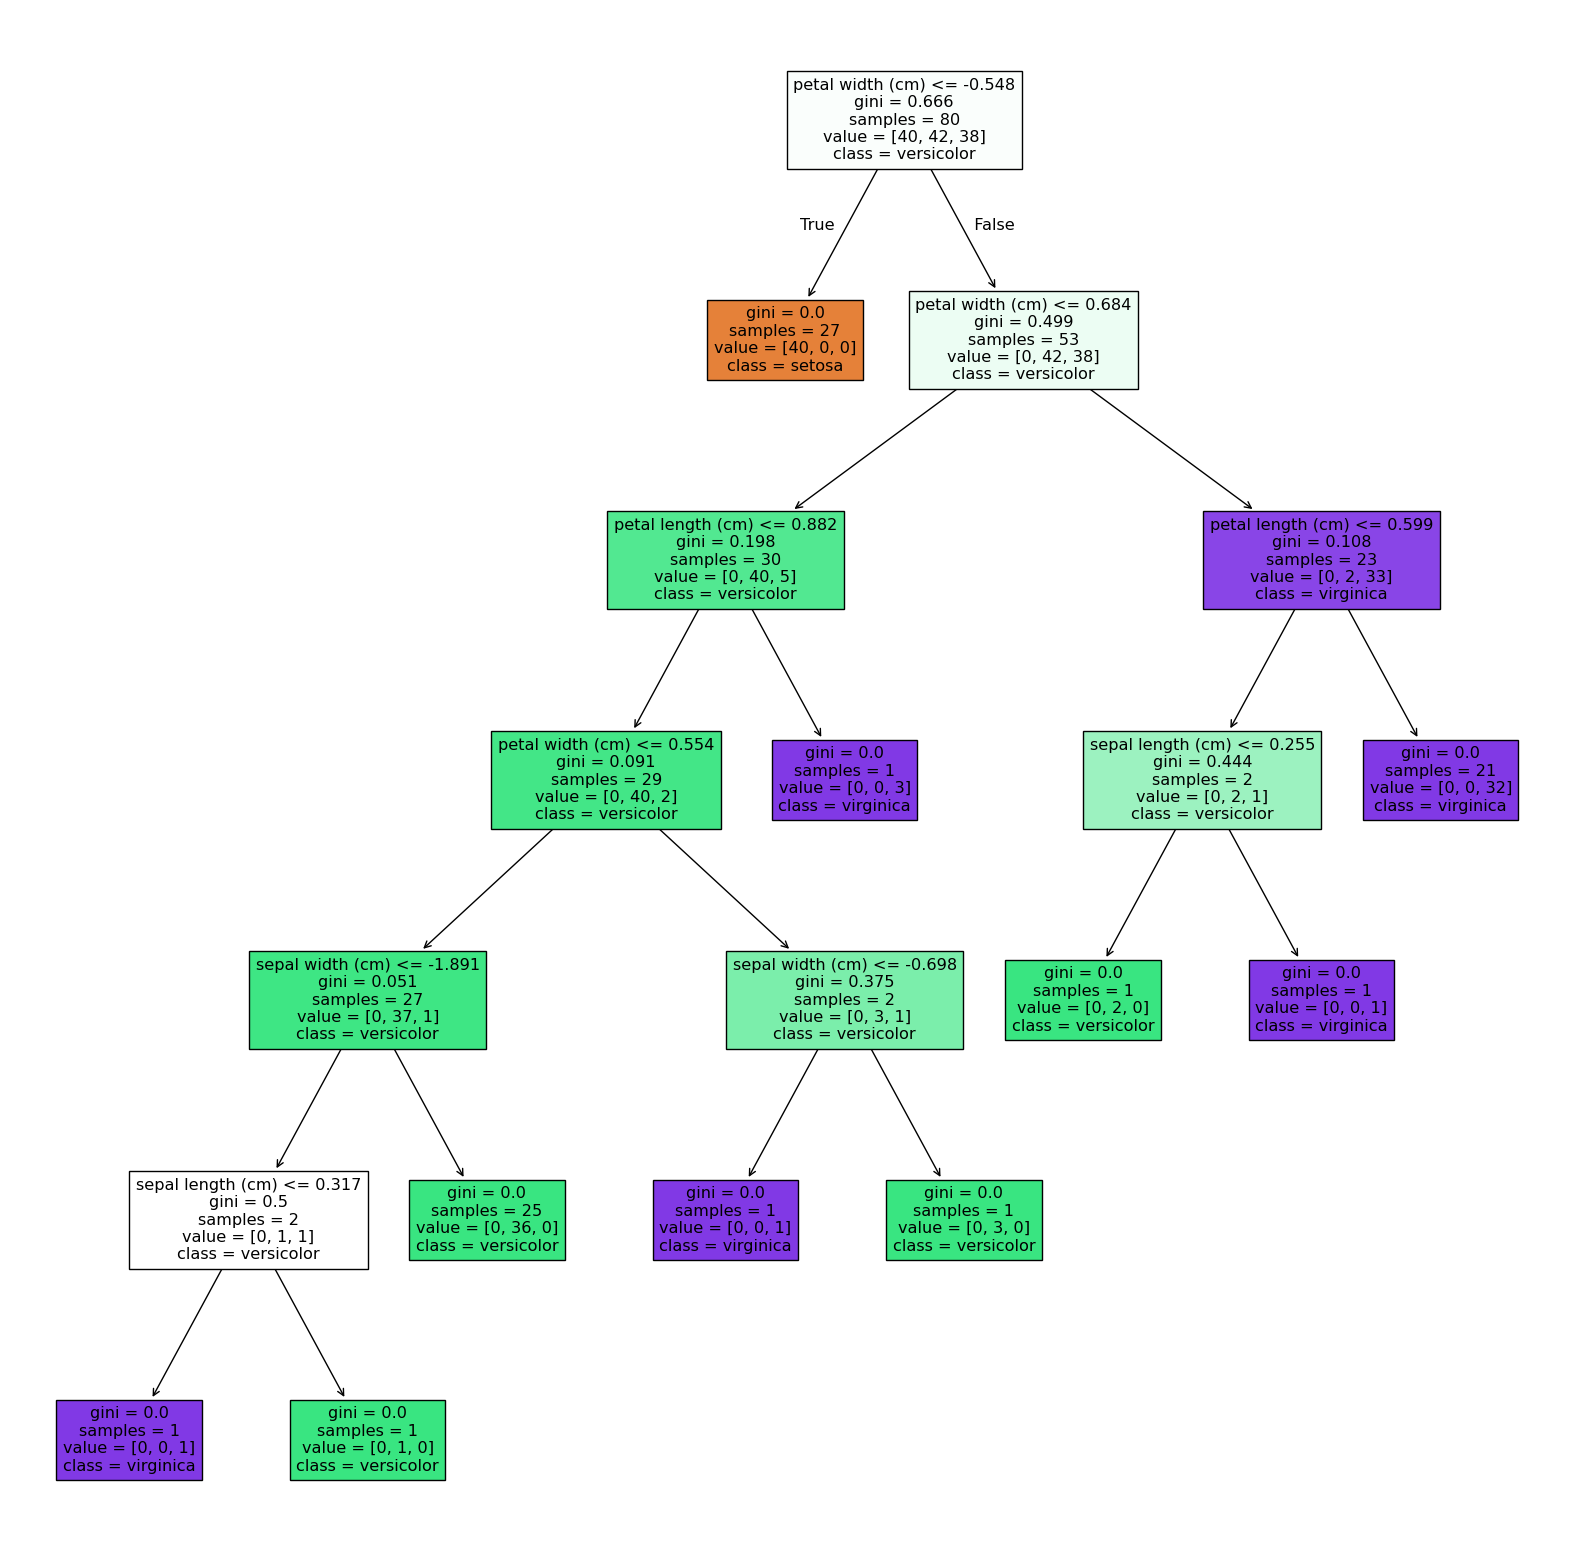

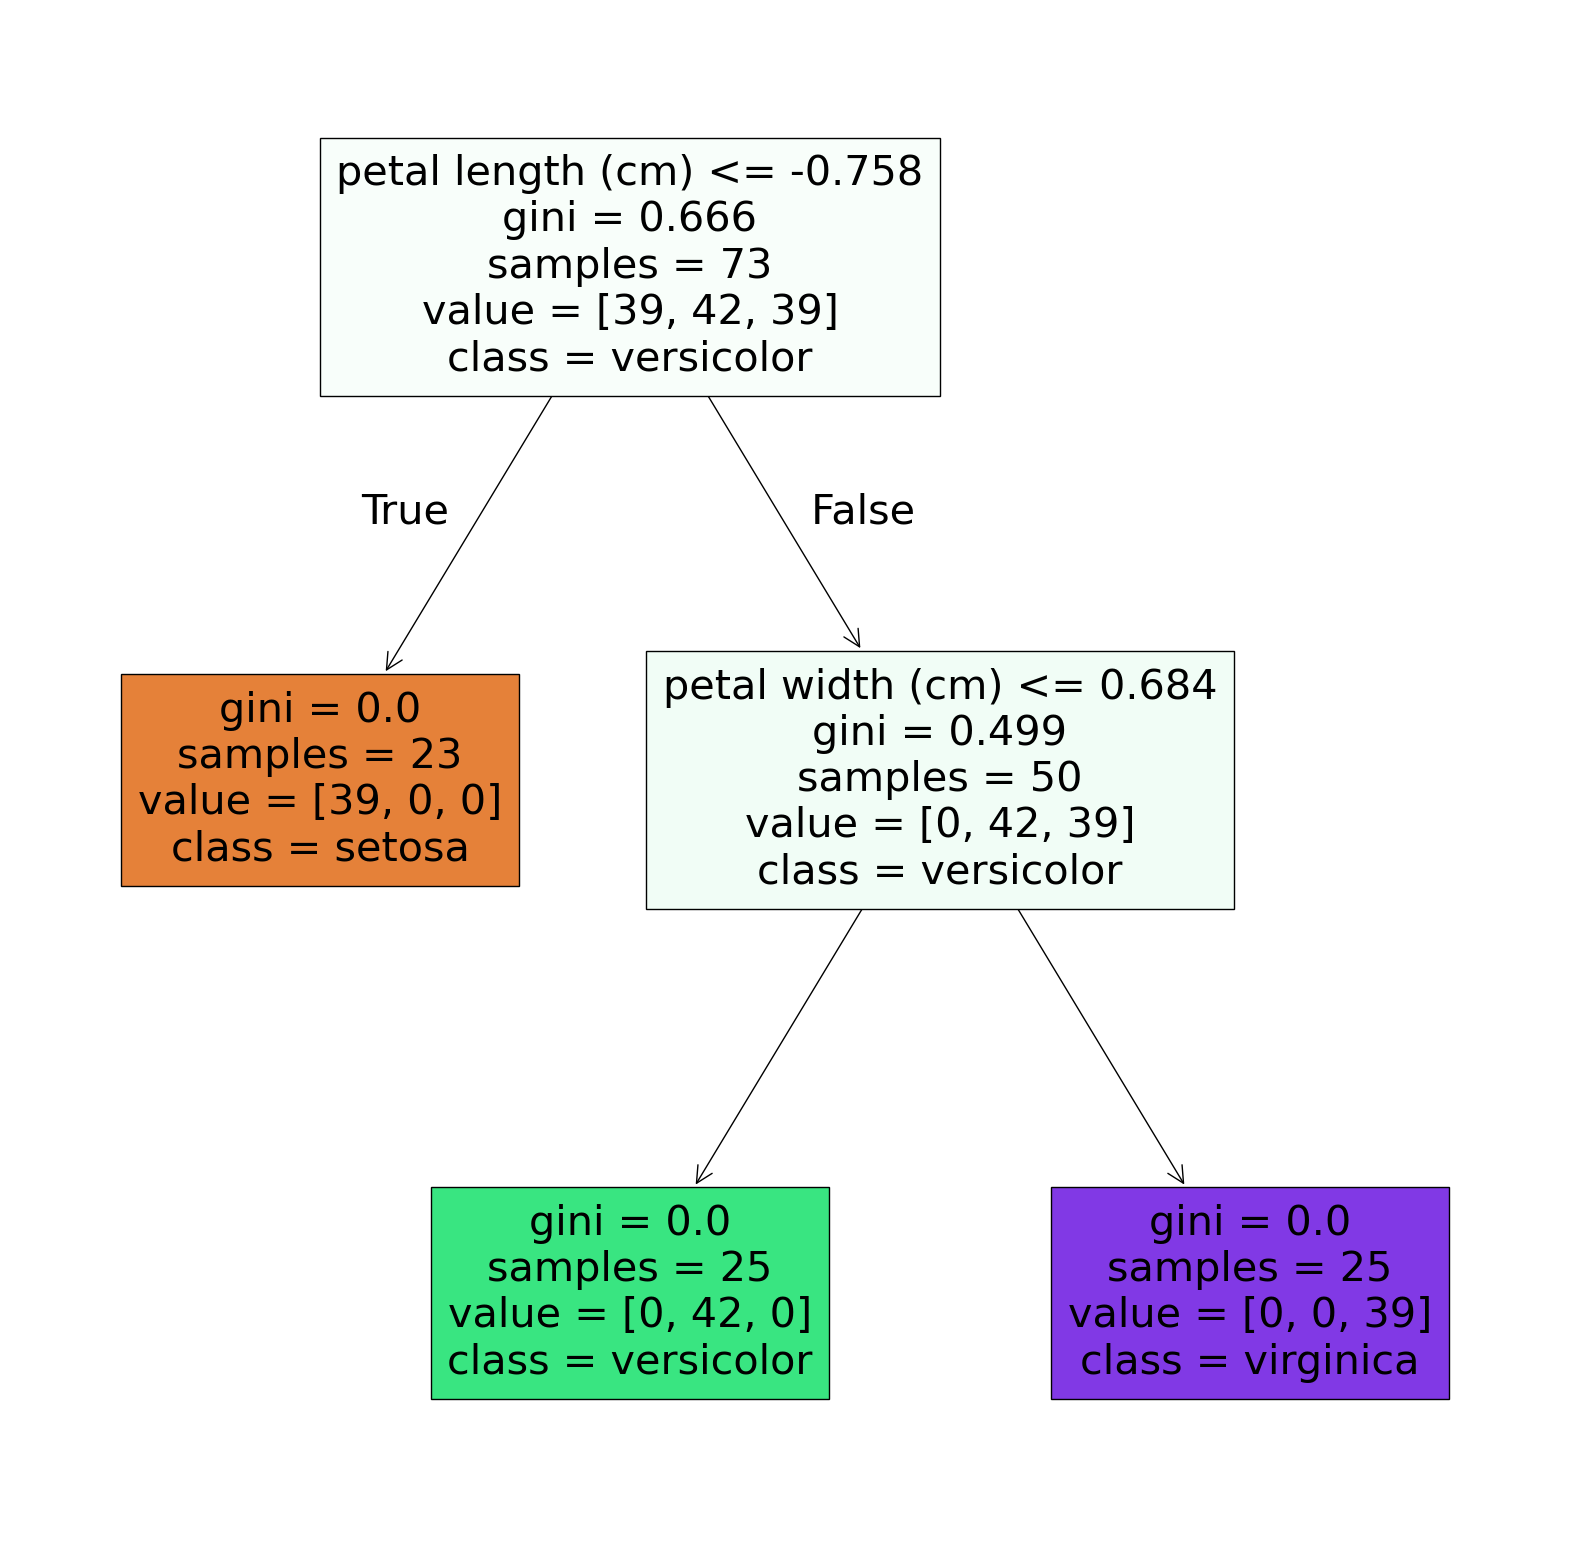

In [67]:
# plot decision tree

for i in range(min(5,len(random_model.estimators_))):
    plt.figure(figsize=(20,20))
    plot_tree(random_model.estimators_[i],feature_names=data.feature_names,class_names=data.target_names,filled=True)